Saving Crop_recommendation.csv to Crop_recommendation (1).csv

First few rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


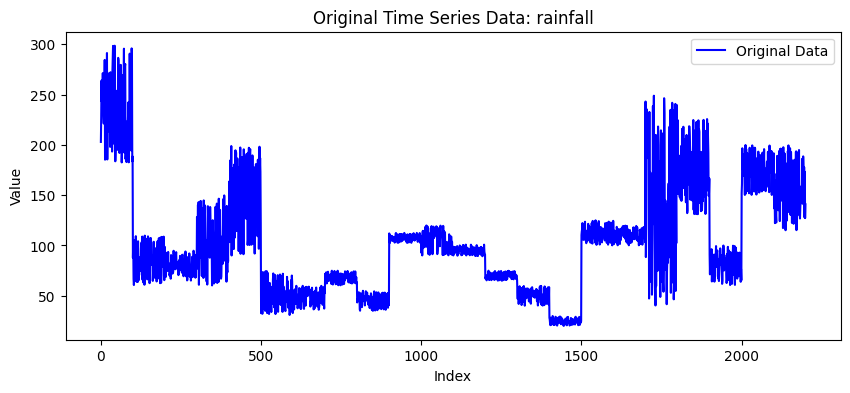

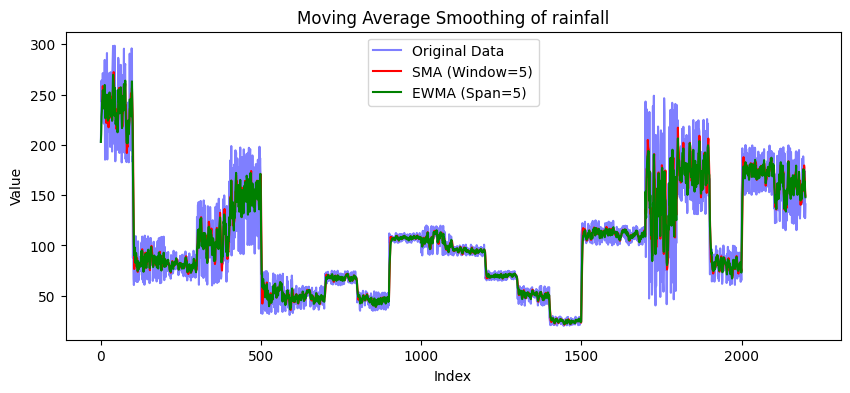


Original Data Sample:
 2195    177.774507
2196    127.924610
2197    173.322839
2198    127.175293
2199    140.937041
Name: rainfall, dtype: float64

SMA Data Sample:
 2195    179.493152
2196    168.794657
2197    165.749094
2198    154.490436
2199    149.426858
Name: rainfall, dtype: float64

EWMA Data Sample:
 2195    174.292938
2196    158.836829
2197    163.665499
2198    151.502097
2199    147.980412
Name: rainfall, dtype: float64


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the CSV File
uploaded = files.upload()

# Get the uploaded file name dynamically
file_name = list(uploaded.keys())[0]

# Step 2: Load the Dataset
df = pd.read_csv(file_name)

# Display first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 3: Select a Time Series Column
column_name = "rainfall"  # Change this to the column you want
if column_name not in df.columns:
    raise ValueError(f"Column '{column_name}' not found in dataset. Available columns: {df.columns}")

time_series = df[column_name]

# Step 4: Plot Original Data
plt.figure(figsize=(10, 4))
plt.plot(time_series, label="Original Data", color='blue')
plt.title(f"Original Time Series Data: {column_name}")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 5: Apply Simple Moving Average (SMA)
window_size = 5  # Modify the window size as needed
sma = time_series.rolling(window=window_size).mean()

# Step 6: Apply Exponentially Weighted Moving Average (EWMA)
ewma = time_series.ewm(span=window_size, adjust=False).mean()

# Step 7: Plot Smoothed Data
plt.figure(figsize=(10, 4))
plt.plot(time_series, label="Original Data", color='blue', alpha=0.5)
plt.plot(sma, label=f"SMA (Window={window_size})", color='red')
plt.plot(ewma, label=f"EWMA (Span={window_size})", color='green')
plt.title(f"Moving Average Smoothing of {column_name}")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 8: Display the Last Few Values
print("\nOriginal Data Sample:\n", time_series.tail())
print("\nSMA Data Sample:\n", sma.tail())
print("\nEWMA Data Sample:\n", ewma.tail())
